## Installations

In [249]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install gradio

## Importations

In [250]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Performance metrics
from sklearn.metrics import accuracy_score, classification_report

#Persistance
import joblib


warnings.filterwarnings('ignore')

## EDA - Exploratory Data Analysis

### Load Dataset

In [251]:
df = pd.read_csv('sales_data.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


### Let's now inspect our data set

In [252]:
df.shape

(34867, 16)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [254]:
df.shape

(34867, 16)

In [255]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [256]:
df.describe(include='object')

,Date,Month,Customer Gender,Country,State,Product Category,Sub Category
count,34866,34866,34866,34866,34866,34866,34866
unique,576,12,2,4,45,3,17
top,3/1/2016,June,M,United States,California,Accessories,Tires and Tubes
freq,196,3680,17805,18076,10332,22534,11112


In [257]:
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [258]:
df.duplicated().sum()

0

### Let's Clean the data

In [259]:
#first let's drop the 
df = df.drop(columns=['index', 'Column1', 'Date', 'Cost', 'Quantity', 'Unit Cost', 'Revenue', 'Year'])

In [260]:
df.dropna(inplace=True)

In [ ]:
df['Year'] = df['Year'].astype(int)

In [261]:
df.head()

,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Unit Price
0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,109.000000
1,February,29.0,F,United States,Washington,Clothing,Gloves,28.500000
2,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,5.000000
3,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,116.500000
4,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,41.666667


In [262]:
df.isna().sum()

Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Unit Price          0
dtype: int64

In [263]:
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany'],
      dtype=object)

In [264]:
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [265]:
df['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

In [266]:
df['State'].unique()

array(['Washington', 'California', 'Oregon', 'Essonne', 'Yveline',
       'England', 'Hessen', 'Hamburg', 'Seine Saint Denis', 'Saarland',
       'Nordrhein-Westfalen', 'Bayern', 'Seine (Paris)', 'Pas de Calais',
       'Moselle', 'Hauts de Seine', 'Nord', 'Seine et Marne', 'Loiret',
       'Charente-Maritime', 'Loir et Cher', 'Brandenburg', 'Alabama',
       "Val d'Oise", 'Val de Marne', 'Minnesota', 'Wyoming', 'Ohio',
       'Garonne (Haute)', 'Kentucky', 'Texas', 'Missouri', 'Somme',
       'New York', 'Florida', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Mississippi', 'Montana',
       'Arizona', 'Massachusetts', 'Utah'], dtype=object)

### Univariate Analysis: Visualize the distribution of dataset

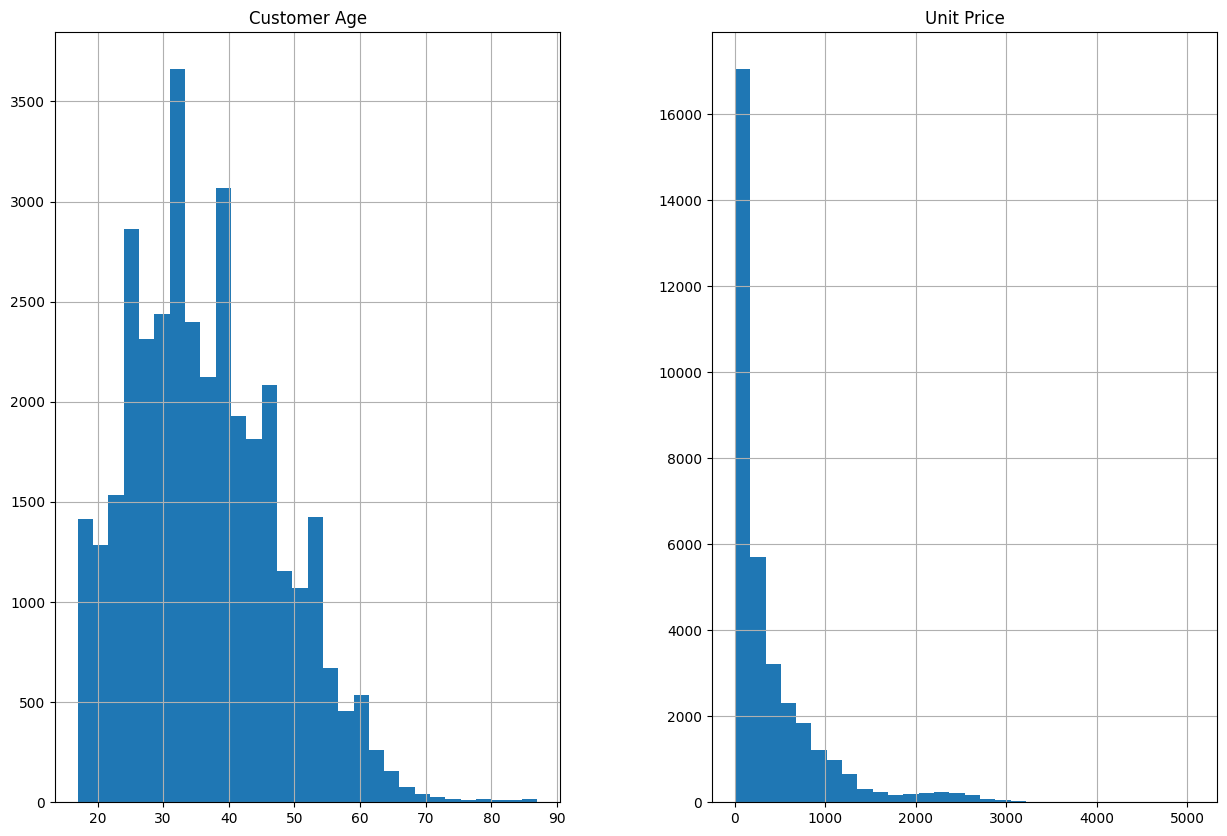

In [267]:
df.hist(figsize=(15, 10), bins=30)
plt.show()

### Bivariate Analysis: Check the correlation between numerical features and 'Revenue'


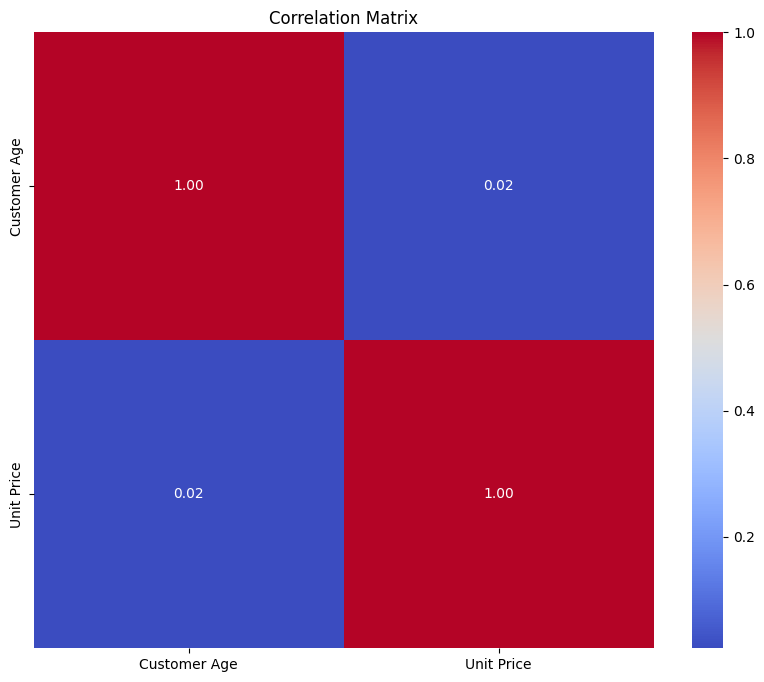

In [268]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Split the data into features (X) and target (y)

In [269]:
X = df.drop(columns=['Customer Gender'])
y = df['Customer Gender']

In [270]:
X.head()

,Month,Customer Age,Country,State,Product Category,Sub Category,Unit Price
0,February,29.0,United States,Washington,Accessories,Tires and Tubes,109.000000
1,February,29.0,United States,Washington,Clothing,Gloves,28.500000
2,February,29.0,United States,Washington,Accessories,Tires and Tubes,5.000000
3,March,29.0,United States,Washington,Accessories,Tires and Tubes,116.500000
4,March,29.0,United States,Washington,Accessories,Tires and Tubes,41.666667


In [271]:
y.head()

0    F
1    F
2    F
3    F
4    F
Name: Customer Gender, dtype: object

In [272]:
# Lets split the data set into training and testing/evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create Preprocessing pipelines

In [285]:
# Preprocessing pipeline 
numeric_features = ['Unit Price']

categorical_features = ['Month', 'Customer Age', 'Country', 'State', 'Product Category', 'Sub Category']




preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

labels = y
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
encoded_labels = label_encoder.fit_transform(labels)
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough', ['Unit Price']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Month', 'Customer Age', 'Country', 'State',
                                  'Product Category', 'Sub Category'])])

## Train and evaluate multiple models using pipelines

### Random Forest

In [274]:
# Initialize the and create a preprocessing pipeline 

rf_model = RandomForestClassifier()
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])


# Train the models
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_pipeline.predict(X_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           F       0.59      0.61      0.60      3351
           M       0.63      0.61      0.62      3623

    accuracy                           0.61      6974
   macro avg       0.61      0.61      0.61      6974
weighted avg       0.61      0.61      0.61      6974



### Logistic Regression

In [275]:
# Initialize the and create a preprocessing pipeline 
lr_model = LogisticRegression()
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lr_model)])

# Train the models
lr_pipeline.fit(X_train, y_train)

# Make predictions on the test set
lr_preds = lr_pipeline.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           F       0.52      0.36      0.42      3351
           M       0.54      0.69      0.60      3623

    accuracy                           0.53      6974
   macro avg       0.53      0.52      0.51      6974
weighted avg       0.53      0.53      0.52      6974



### Decision Tree

In [276]:
# Initialize the and create a preprocessing pipeline 
dt_model = DecisionTreeClassifier()
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', dt_model)])

# Train the models
dt_pipeline.fit(X_train, y_train)

# Make predictions on the test set
dt_preds = dt_pipeline.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           F       0.54      0.54      0.54      3351
           M       0.57      0.57      0.57      3623

    accuracy                           0.56      6974
   macro avg       0.56      0.56      0.56      6974
weighted avg       0.56      0.56      0.56      6974



### KNeighbors

In [277]:
# Initialize the and create a preprocessing pipeline 
knn_model = KNeighborsClassifier()
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn_model)])

# Train the models
knn_pipeline.fit(X_train, y_train)

# Make predictions on the test set
knn_preds = knn_pipeline.predict(X_test)

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_preds))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           F       0.49      0.50      0.50      3351
           M       0.53      0.51      0.52      3623

    accuracy                           0.51      6974
   macro avg       0.51      0.51      0.51      6974
weighted avg       0.51      0.51      0.51      6974



### GradientBooster

In [278]:
# Initialize the and create a preprocessing pipeline 
gb_model = GradientBoostingClassifier()
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gb_model)])

# Train the models
gb_pipeline.fit(X_train, y_train)

# Make predictions on the test set
gb_preds = gb_pipeline.predict(X_test)


print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           F       0.49      0.46      0.48      3351
           M       0.53      0.56      0.54      3623

    accuracy                           0.51      6974
   macro avg       0.51      0.51      0.51      6974
weighted avg       0.51      0.51      0.51      6974



## Fine Tuning the model Using GridSearchCV 

In [279]:

# Define the hyperparameter grids for tuning
rf_param_grid = {
    'classifier__n_estimators': [20, 50, 30],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for  model
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=3)


# Train the models using GridSearchCV
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_


In [280]:
# Make predictions on the test set using the best-performing models from GridSearchCV
rf_preds_tuned = best_rf_model.predict(X_test)

In [281]:
# Make predictions on the test set
rf_preds_tuned = rf_pipeline.predict(X_test)

In [282]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           F       0.59      0.61      0.60      3351
           M       0.63      0.61      0.62      3623

    accuracy                           0.61      6974
   macro avg       0.61      0.61      0.61      6974
weighted avg       0.61      0.61      0.61      6974



In [ ]:
# Evaluate the model
svr_preds = svr_model.predict(X_test)

svr_rmse = mean_squared_error(y_test, svr_preds, squared=False)

print(f"Support Vector Regression RMSE: {svr_rmse}")

In [ ]:
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Support Vector Regression RMSE: {svr_rmse}")

### Model Persistance

In [283]:
# Save the Random Forest model

best_model = rf_model
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')


['preprocessor.joblib']